In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size = 100)
X = x.reshape(-1, 1)
y = x**2 + x + 2  + np.random.normal(size=100)
y.shape

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
def PolyRegression(degree = 20):
    return Pipeline([
            ('Poly', PolynomialFeatures(degree=degree)),
            ('sta_scaler', StandardScaler()),
            ('line_reg', LinearRegression())
        ])

poly_reg20 = PolyRegression(degree = 20)
poly_reg20.fit(X, y)

Pipeline(memory=None,
     steps=[('Poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('sta_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('line_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [3]:
# 绘制图像的函数
def plot_mode(model):
    plt.scatter(x, y)
    y_predict = model.predict(X)
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

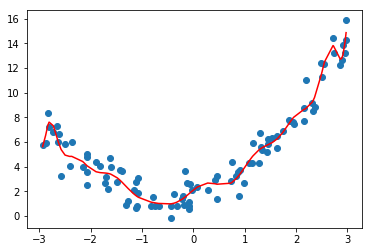

In [4]:
plot_mode(poly_reg20)

### 使用岭回归

In [5]:
%%html
<img src="./img/Ridge.png", width=400, height=800>

In [7]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
            ('Poly', PolynomialFeatures(degree=degree)),
            ('sta_scaler', StandardScaler()),
            ('rid_reg', Ridge(alpha=alpha))
        ])

In [11]:
from sklearn.metrics import mean_squared_error
rid_reg20 = RidgeRegression(20, 100)
rid_reg20.fit(X, y)
ridge_reg20_predict = rid_reg20.predict(X)
mean_squared_error(y, ridge_reg20_predict)

2.698107448261759

In [12]:
# 绘制图像的函数
def plot_mode(model):
    plt.scatter(x, y)
    y_predict = model.predict(X)
    plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

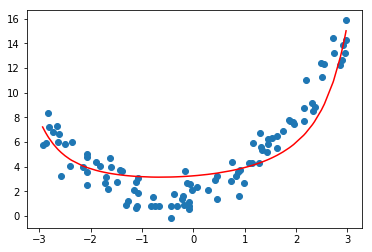

In [14]:
plot_mode(rid_reg20)

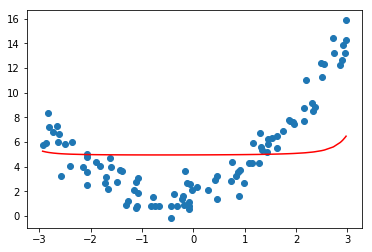

In [16]:
rid_reg10000 = RidgeRegression(20, 10000)
rid_reg10000.fit(X, y)
ridge_reg10000_predict = rid_reg10000.predict(X)
mean_squared_error(y, ridge_reg10000_predict)
plot_mode(rid_reg10000)

### END